# Introduction

Road lane detection is a major problem in self driving cars. This notebook aims to identify road lanes in images captured from camera attached to the front of the car.

In [1]:
# all imports

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

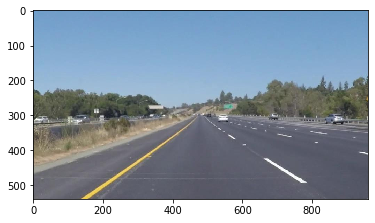

In [2]:
orig_img = cv2.imread('img-1.jpeg')
rgb_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

## Exploring colorspaces

We explore different colorspaces to check in which colorspace the road lanes are most prominent

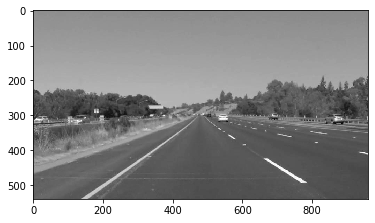

In [3]:
# convert image to grayscale
orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
# print(orig_gray.shape)
plt.imshow(orig_gray, cmap='gray')

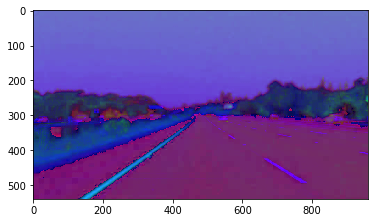

In [4]:
# convert to hsv colorspace
hsv_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

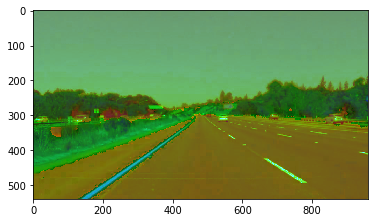

In [5]:
# convert to hls colorspace
hls_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2HLS)
plt.imshow(hls_img)

We see that road lanes are most prominent in HLS colorspace. Hence, we use images in this colorspace for further processing.

## Image masking

We see that road lanes occur in white and yellow colours which correspond to (0,200,0) to (255,255,255) and (10,0,100) to (40,255,255) ranges respectively.

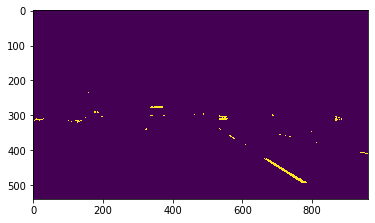

In [6]:
# white mask
white_mask = cv2.inRange(hls_img, np.array([0,200,0]), np.array([255,255,255]))
plt.imshow(white_mask)

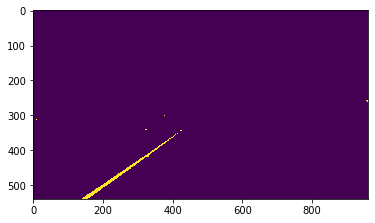

In [7]:
# yellow mask
yellow_mask = cv2.inRange(hls_img, np.array([10, 0, 100]), np.array([40, 255, 255]))
plt.imshow(yellow_mask)

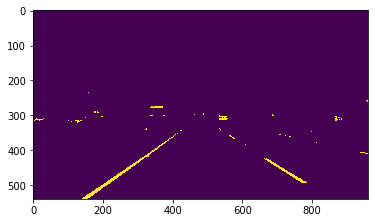

In [8]:
# white and yellow mask
white_yellow_mask = cv2.bitwise_or(white_mask, yellow_mask)
plt.imshow(white_yellow_mask)

## Edge detection

We now use Canny edge detection and find appropriate thresholds to detect the road lanes. These thresholds are found by hit and trial method.

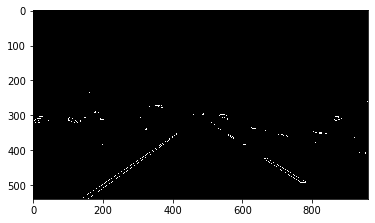

In [9]:
# edge detection
edges = cv2.Canny(white_yellow_mask, 240, 255)
plt.imshow(edges, cmap='gray')

## Choosing a region of interest

Since the camera position is constant on the car, we can safely say that only the edges in lower half of the images are of interest. Hence, we take a black mask and copy lower half pixels on it.

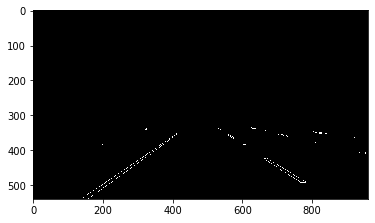

In [10]:
# edges on black mask
black_mask = np.zeros(edges.shape, dtype=edges.dtype)
edges[:330, :] = black_mask[:330, :]
plt.imshow(edges, cmap='gray')

## Hough transform

Since the road lanes are not continuous, we use Hough transform to join pixels that belong to the same road lane. Here, probabilistic Hough transform is used to speed up the computation.

In [11]:
# hough transform to join edges
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 20, np.array([]), minLineLength=10, maxLineGap=300)
print(lines)

[[[139 538 427 343]]

 [[159 539 397 366]]

 [[662 426 769 492]]

 [[175 527 402 362]]

 [[531 336 759 478]]

 [[625 335 957 411]]

 [[701 355 958 409]]

 [[712 458 767 492]]

 [[256 460 427 341]]

 [[159 538 421 347]]

 [[797 346 922 363]]

 [[532 339 769 482]]

 [[560 358 775 492]]

 [[801 349 922 364]]

 [[725 456 774 487]]]


## Output

Finally, we draw the detected road lanes on the original image.

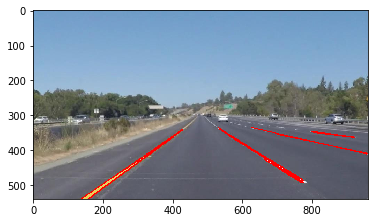

In [12]:
# drawing lines on original image
for points in lines:
    x1 = points[0][0]
    y1 = points[0][1]
    x2 = points[0][2]
    y2 = points[0][3]
    cv2.line(orig_img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))